In [1]:
import sys; sys.path.insert(0, '..') # So that we import the local copy of pyzx if you have installed from Github
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from multiprocessing import Pool
import pyzx as zx
from pyzx import cnot_mapper, architecture # Note that this is the local pyzx package from this repository/fork, not the one installed through pip or other means.
from pyzx import circuit
from pyzx import *
from pyzx.parity_maps import CNOT_tracker, build_random_parity_map
from pyzx.linalg import Mat2
from pyzx.simplify import full_reduce

Load comb circuits

In [2]:
comb_circuit_folder = "../circuits/combs/"

circuit_properties = {"Qubits"    : 3,
                      "CNOTs"     : 2,
                      "Non-CNOTs" : 0}
path = os.path.join(comb_circuit_folder, 
                    str(circuit_properties["Qubits"])+"qubits", 
                    str(circuit_properties["CNOTs"])+"cnots", 
                    str(circuit_properties["Non-CNOTs"])+"non-cnots")
loaded_circuits = []
if os.path.exists(path):
    for file_name in os.listdir(path):
        loaded_circuits.append(circuit.Circuit.from_qasm_file(os.path.join(path, file_name)))
else:
    print("Directory Does Not Exist")

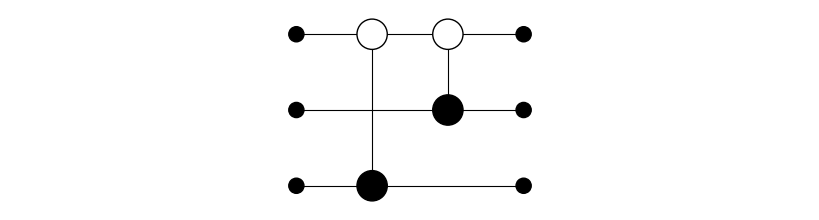

3q-fully_connected
ROWCOL -  0 [0, 1, 2]
[ 1.0  0.0  0.0 ]
[ 1.0  1.0  0.0 ]
[ 1.0  0.0  1.0 ]
Eliminate the column
Eliminate the row


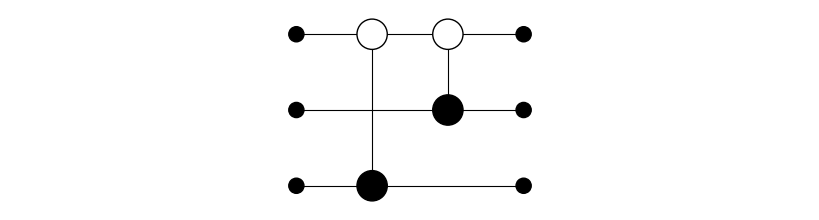

3q-fully_connected
ROWCOL -  1 [1, 2]
[ 1.0  0.0  0.0 ]
[ 0.0  1.0  0.0 ]
[ 0.0  0.0  1.0 ]
Eliminate the column
Eliminate the row


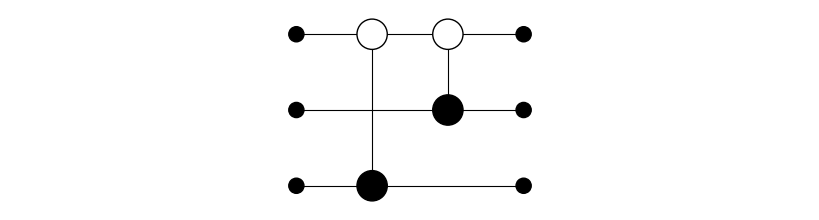

3q-fully_connected
ROWCOL -  2 [2]
[ 1.0  0.0  0.0 ]
[ 0.0  1.0  0.0 ]
[ 0.0  0.0  1.0 ]
Eliminate the column
Eliminate the row


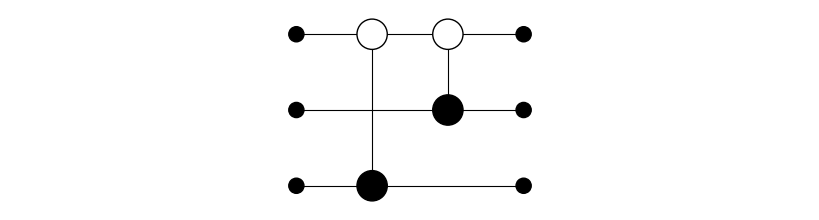

In [30]:
from IPython.display import display, Markdown

comb = CombDecomposition.from_circuit(loaded_circuits[3]).comb
display(zx.draw(comb))
new_comb = CNOTComb(comb.qubits, comb.holes, comb.new_to_old_qubit_mappings)
arch = architecture.create_architecture(architecture.FULLY_CONNNECTED, n_qubits=loaded_circuits[0].qubits)

rowcols_to_eliminate = [0,1,2]
for rowcol_index in range(len(rowcols_to_eliminate)):
    # Remove rowcol from matrix
    rowcol_iteration(comb.matrix,
                     arch,
                     rowcols_to_eliminate[rowcol_index],
                     rowcols_to_eliminate[rowcol_index:],
                     circuit=new_comb)
    display(zx.draw(new_comb))